In [0]:
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
import time
from pylab import rcParams
from os import listdir
import csv
from xgboost import XGBClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score

# a_traincsv = listdir('/kaggle/input/training_setA/training')
# b_traincsv = listdir('/kaggle/input/training_setB/training_setB')

In [0]:
train = pd.read_csv('train_patient.csv')
train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,1,0,0,0
1,73.0,100.0,36.17,NaN,85.0,NaN,31.0,NaN,7.0,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,2,0,0,1
2,88.0,99.0,NaN,NaN,87.0,NaN,31.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,3,0,0,2
3,90.0,99.0,NaN,NaN,90.0,NaN,25.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,4,0,0,3
4,93.0,98.0,NaN,NaN,96.0,NaN,28.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,5,0,0,4


In [0]:
train_copy = train.groupby('Patient_id').mean().fillna(train.mean())
train_copy['SepsisLabel'][train_copy['SepsisLabel']!=0] = 1
x = train_copy.drop(['SepsisLabel'],axis = 1)
y = train_copy['SepsisLabel']

In [0]:
test = pd.read_csv('results/test_patient.csv')
test_copy = test.fillna(train.mean())
x_test = test_copy.drop(['SepsisLabel','Patient_id'],axis = 1)
y_test = test_copy['SepsisLabel']

In [0]:
val = pd.read_csv('results/val_patient.csv')
val = val.fillna(train.mean())
x_val = val.drop(['SepsisLabel','Patient_id'],axis = 1)
y_val = val['SepsisLabel']

In [0]:
y.value_counts()

0.0    27987
1.0     2349
Name: SepsisLabel, dtype: int64

In [0]:
xgb = XGBClassifier()
xgb.fit(x,y)

y_pred = xgb.predict(x)
print("Train Accuracy: ",accuracy_score(y_pred, y))
y_pred = xgb.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_pred, y_test))
y_pred = xgb.predict(x_val)
print("Validation Accuracy: ",accuracy_score(y_pred, y_val))

Train Accuracy:  0.9614319620253164
Test Accuracy:  0.9229284957375805
Validation Accuracy:  0.9260290817747555


Test Accuracy:  0.9229284957375805
[[174474  12378]
 [  2241    588]]


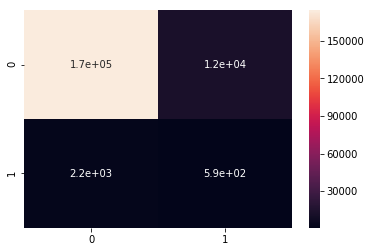

In [0]:
from sklearn import metrics 
y_pred = xgb.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_pred, y_test))
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sn
sn.heatmap(cm, annot=True)

In [0]:
corrmat = train.corr()['SepsisLabel']
  
#f, ax = plt.subplots(figsize =(9, 8)) 
corrmat#.style.background_gradient(cmap='coolwarm')

HR                  0.046490
O2Sat              -0.007644
Temp                0.047500
SBP                -0.010407
MAP                -0.014813
DBP                -0.013430
Resp                0.049453
EtCO2              -0.005711
BaseExcess          0.017788
HCO3               -0.013395
FiO2                0.017379
pH                  0.000524
PaCO2               0.016432
SaO2                0.008009
AST                 0.000182
BUN                 0.051254
Alkalinephos        0.016244
Calcium            -0.029612
Chloride           -0.011262
Creatinine          0.027175
Bilirubin_direct    0.055492
Glucose             0.005790
Lactate            -0.001123
Magnesium           0.004295
Phosphate           0.017181
Potassium           0.001127
Bilirubin_total     0.053435
TroponinI          -0.013920
Hct                -0.013899
Hgb                -0.018512
PTT                 0.020607
WBC                 0.033416
Fibrinogen          0.048575
Platelets          -0.007727
Age           

In [0]:
pd.concat([train[train['SepsisLabel'] == 0][:int(1172238*0.02)],train[train['SepsisLabel'] == 1]],axis = 0).corr()['SepsisLabel']

HR                  0.158369
O2Sat              -0.031609
Temp                0.104794
SBP                -0.011382
MAP                 0.015004
DBP                 0.060683
Resp                0.151410
EtCO2                    NaN
BaseExcess          0.047484
HCO3               -0.048827
FiO2                0.071613
pH                 -0.008565
PaCO2               0.047473
SaO2                0.101704
AST                -0.012691
BUN                 0.187393
Alkalinephos        0.007463
Calcium            -0.223805
Chloride           -0.021269
Creatinine          0.121087
Bilirubin_direct    0.081712
Glucose             0.015228
Lactate             0.004262
Magnesium           0.055382
Phosphate           0.013661
Potassium          -0.000104
Bilirubin_total     0.056589
TroponinI          -0.056509
Hct                -0.050423
Hgb                -0.091619
PTT                 0.059092
WBC                 0.097104
Fibrinogen          0.205988
Platelets          -0.003757
Age           

In [0]:
train[train['Patient_id'] == 8]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,1,0,8,0
283,62.0,99.0,NaN,84.0,64.67,NaN,12.0,NaN,NaN,NaN,...,146.0,77.93,1,NaN,NaN,-0.02,2,0,8,1
284,61.0,99.0,NaN,92.0,67.33,NaN,12.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,3,0,8,2
285,68.0,99.0,NaN,92.0,69.33,NaN,18.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,4,0,8,3
286,65.0,98.0,NaN,101.0,73.00,NaN,NaN,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,5,0,8,4
287,63.0,97.0,NaN,99.0,67.67,NaN,17.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,6,0,8,5
288,61.0,100.0,NaN,83.0,61.67,NaN,12.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,7,0,8,6
289,61.0,99.0,NaN,126.0,84.67,NaN,9.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,8,0,8,7
290,61.0,97.0,36.67,94.0,63.33,NaN,13.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,9,0,8,8
291,63.0,99.0,NaN,94.0,65.33,NaN,17.0,NaN,NaN,NaN,...,NaN,77.93,1,NaN,NaN,-0.02,10,0,8,9
